IMPORT MODULES

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols

In [2]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [3]:
import pandas as pd

training_data = pd.read_csv('kc_house_data_train.csv', index_col=0)

model = forward_selected(training_data, 'price')

print(model.model.formula)
# sl ~ rk + yr + 1

print(model.rsquared_adj)
# 0.835190760538

price ~ sqft_living + lat + view + grade + yr_built + waterfront + bedrooms + bathrooms + zipcode + long + date + condition + sqft_above + sqft_living15 + yr_renovated + sqft_lot15 + id + sqft_lot + floors + 1
0.7002315857870925


---

In [20]:
test_features = pd.read_csv('kc_house_data_test_features.csv', index_col=0)

In [21]:
training_data = pd.read_csv('kc_house_data_train.csv', index_col=0)

---

In [11]:
test_features.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576
3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565
4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916


In [12]:
training_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


MADE FEATURES DATAFRAME

In [22]:
features_df = training_data[['sqft_living', 'zipcode', 'bathrooms', 'bedrooms', 'grade', 'waterfront']]

In [23]:
features_df

,sqft_living,zipcode,bathrooms,bedrooms,grade,waterfront
0,2070,98058,2.25,4,8,0
1,2900,98115,3.00,5,8,0
2,3770,98006,2.50,4,11,0
3,4560,98034,3.50,3,12,0
4,2550,98052,2.50,3,9,0
...,...,...,...,...,...,...
17285,3240,98008,2.50,5,8,0
17286,1300,98105,1.75,2,7,0
17287,1050,98028,1.00,3,7,0
17288,1900,98038,1.50,3,7,0


EDA

In [127]:
training_data[training_data.price > 6000000]['zipcode'].values

array([98004, 98039, 98102])

In [130]:
training_data.grade.unique()

array([ 8, 11, 12,  9,  7,  6, 10,  5, 13,  4,  3,  1])

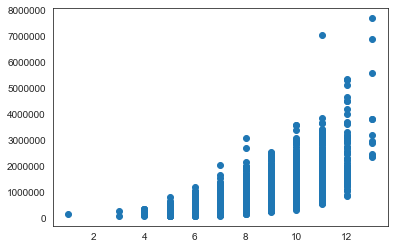

In [131]:
plt.scatter(training_data.grade, training_data.price)

/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


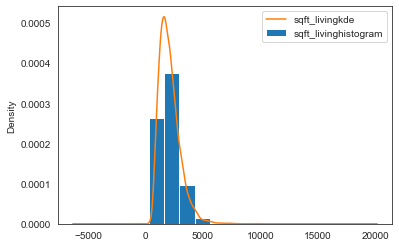

/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


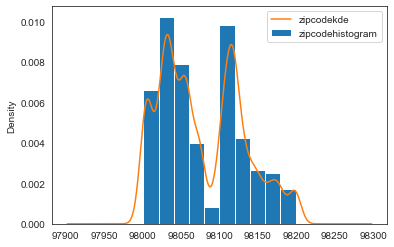

/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


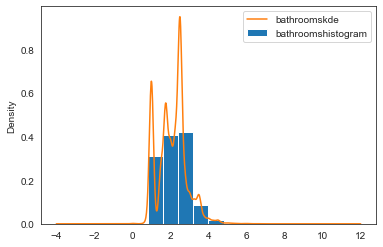

/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


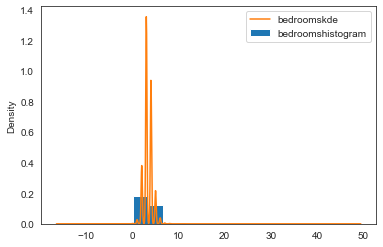

/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


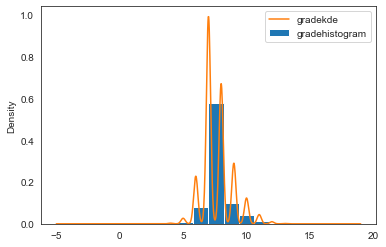

/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


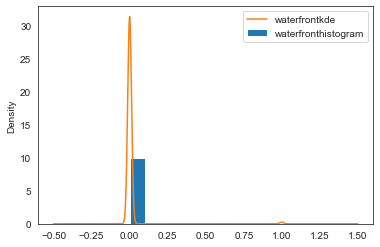

In [58]:
for column in features_df:
    features_df[column].plot.hist(normed=True, label=column+'histogram')
    features_df[column].plot.kde(label=column+'kde')
    plt.legend()
    plt.show()

In [ ]:
# non_normal = ['displacement', 'horsepower', 'weight']
# for feat in non_normal:
#     data[feat] = data[feat].map(lambda x: np.log(x))
# pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

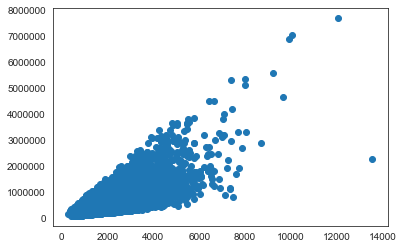

In [136]:
plt.scatter(training_data.sqft_living,training_data.price)

(array([6.007e+03, 8.618e+03, 2.231e+03, 3.460e+02, 6.000e+01, 2.100e+01,
        2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([  290.,  1615.,  2940.,  4265.,  5590.,  6915.,  8240.,  9565.,
        10890., 12215., 13540.]),
 <a list of 10 Patch objects>)

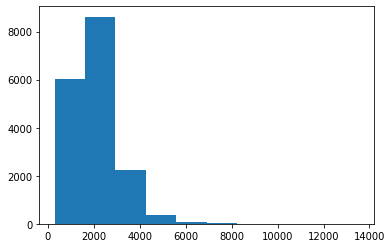

In [4]:
plt.hist(training_data.sqft_living)

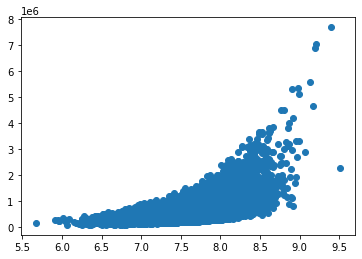

In [32]:
training_data['sqft_living_log'] = training_data['sqft_living'].map(lambda x: np.log(x))
plt.scatter(training_data.sqft_living_log,training_data.price)

(array([8.000e+00, 5.000e+01, 7.150e+02, 2.842e+03, 5.549e+03, 5.393e+03,
        2.310e+03, 3.740e+02, 4.400e+01, 5.000e+00]),
 array([5.66988092, 6.05423319, 6.43858545, 6.82293771, 7.20728997,
        7.59164223, 7.9759945 , 8.36034676, 8.74469902, 9.12905128,
        9.51340355]),
 <a list of 10 Patch objects>)

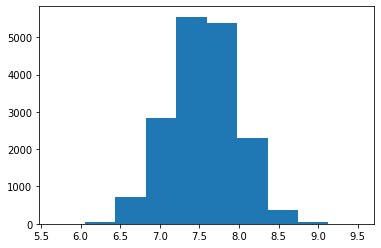

In [33]:
plt.hist(training_data['sqft_living_log'])

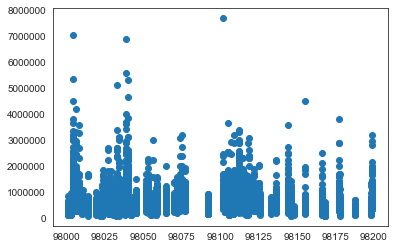

In [60]:
plt.scatter(training_data.zipcode,training_data.price)

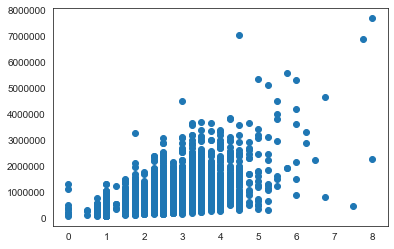

In [55]:
plt.scatter(training_data.bathrooms,training_data.price)

In [29]:
training_data.condition.unique()

array([4, 5, 3, 2, 1])

In [13]:
training_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [59]:
training_data.zipcode.unique()

array([98058, 98115, 98006, 98034, 98052, 98031, 98007, 98199, 98027,
       98119, 98122, 98155, 98055, 98118, 98014, 98059, 98004, 98053,
       98072, 98133, 98092, 98074, 98125, 98045, 98106, 98022, 98177,
       98008, 98002, 98040, 98029, 98042, 98001, 98065, 98056, 98144,
       98188, 98109, 98010, 98075, 98198, 98030, 98105, 98023, 98028,
       98112, 98038, 98116, 98103, 98178, 98168, 98005, 98077, 98146,
       98011, 98126, 98108, 98136, 98033, 98003, 98117, 98107, 98019,
       98102, 98032, 98148, 98166, 98070, 98024, 98039])

(array([15571.,     0.,   264.,     0.,     0.,   775.,     0.,   410.,
            0.,   270.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

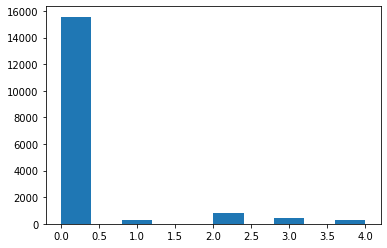

In [21]:
plt.hist(training_data.view)

In [6]:
# corr = training_data.corr()
# corr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ca25bd0>,
      dtype=object)

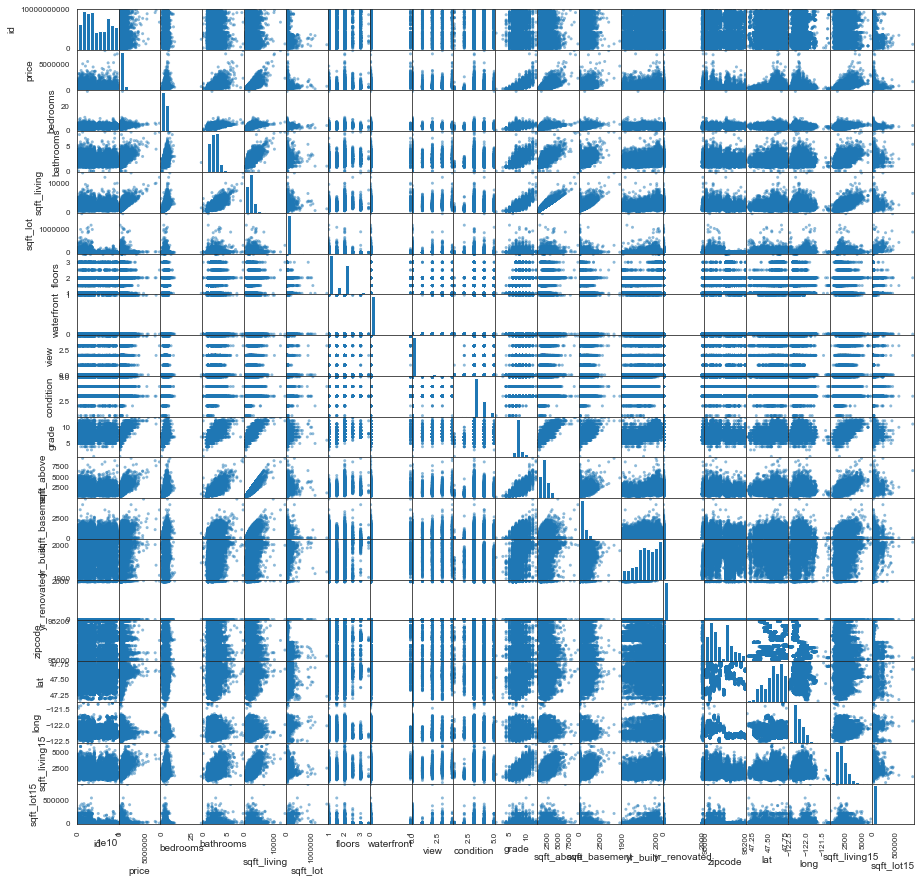

In [33]:
pd.plotting.scatter_matrix(training_data, figsize=[15,15])

In [36]:
training_data.grade.unique()

array([ 8, 11, 12,  9,  7,  6, 10,  5, 13,  4,  3,  1])

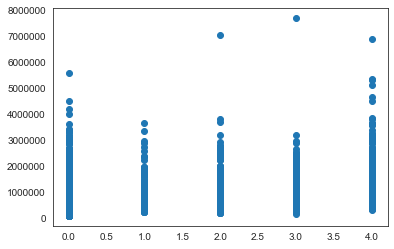

In [37]:
plt.scatter(training_data.view, training_data.price)

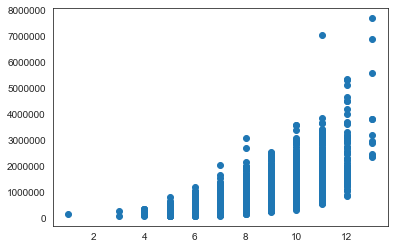

In [39]:
plt.scatter(training_data.grade, training_data.price)

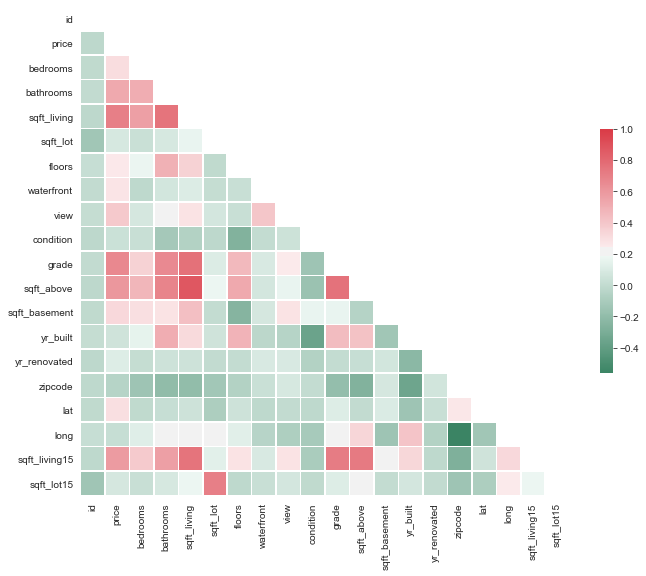

In [28]:
def CorrMtx(df, dropDuplicates = True):
    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(150, 10, as_cmap=True)
    
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

CorrMtx(corr, dropDuplicates = True)

---

CREATE DUMMIES FOR ZIPCODE

In [24]:
zipcode_dummy = pd.get_dummies(training_data['zipcode'],prefix='zip', drop_first=True)

In [25]:
zipcode_dummy

,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
training_data = pd.concat([training_data, zipcode_dummy], axis=1, sort=False)

In [27]:
training_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,...,0,0,0,0,0,0,0,0,0,0


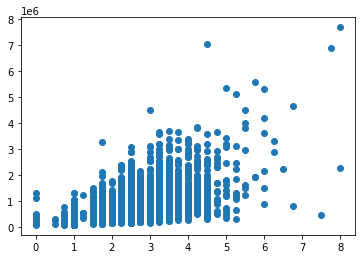

In [58]:
plt.scatter(training_data['bathrooms'], training_data['price'])

In [60]:
#if a house has 2 or more bathrooms, it's a 1 otherwise a 0
training_data['bathrooms_binary'] = np.where(training_data['bathrooms'].values >= 2, 1,0)  

In [61]:
training_data['bathrooms_binary']

0        1
1        1
2        1
3        1
4        1
        ..
17285    1
17286    0
17287    0
17288    0
17289    0
Name: bathrooms_binary, Length: 17290, dtype: int64

In [57]:
training_data['bathrooms'].value_counts(ascending=True)

7.75       1
6.50       1
7.50       1
6.25       2
6.75       2
8.00       2
0.50       3
5.75       3
6.00       6
1.25       6
5.50       7
0.00       8
5.25      11
4.75      16
5.00      17
0.75      52
4.25      64
4.50      76
4.00     107
3.75     135
3.25     455
3.50     591
3.00     592
2.75     896
1.50    1168
2.00    1549
2.25    1666
1.75    2431
1.00    3100
2.50    4322
Name: bathrooms, dtype: int64

In [70]:
training_data['grade'].unique()

array([ 8, 11, 12,  9,  7,  6, 10,  5, 13,  4,  3,  1])

In [72]:
grade_dummy = pd.get_dummies(training_data['grade'],prefix='grade_cat', drop_first=True)

In [74]:
training_data = pd.concat([training_data, grade_dummy], axis=1, sort=False)

In [75]:
training_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_cat_4,grade_cat_5,grade_cat_6,grade_cat_7,grade_cat_8,grade_cat_9,grade_cat_10,grade_cat_11,grade_cat_12,grade_cat_13
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,0,0,0,0,0,0,0,1,0,0
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,0,0,0,0,0,0,0,0,1,0
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,...,0,0,0,0,1,0,0,0,0,0
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,...,0,0,0,1,0,0,0,0,0,0
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,...,0,0,0,1,0,0,0,0,0,0


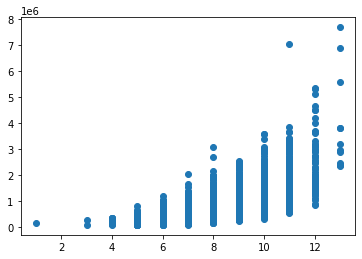

In [76]:
plt.scatter(training_data['grade'], training_data['price'])

(array([1.0000e+00, 2.0000e+00, 2.2000e+01, 1.9200e+02, 1.6480e+03,
        1.2031e+04, 2.0990e+03, 8.9300e+02, 3.1900e+02, 8.3000e+01]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <a list of 10 Patch objects>)

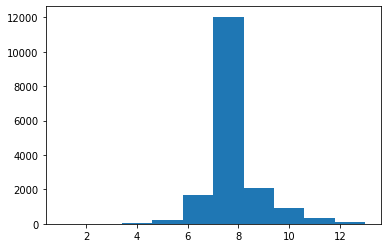

In [87]:
plt.hist(training_data['grade'])

In [78]:
training_data['bedrooms'].max()

33

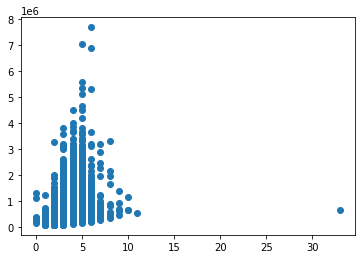

In [77]:
plt.scatter(training_data['bedrooms'], training_data['price'])

---

In [ ]:
training_data['sqft_living_log'] = training_data['sqft_living'].map(lambda x: np.log(x))
plt.scatter(training_data.sqft_living_log,training_data.price)

In [102]:
training_data['price_log'] = training_data['price'].map(lambda x: np.log(x))

(array([  50.,  424., 3180., 5744., 5086., 2044.,  562.,  158.,   35.,
           7.]),
 array([11.22524339, 11.68839214, 12.15154089, 12.61468964, 13.07783839,
        13.54098714, 14.00413589, 14.46728464, 14.93043339, 15.39358214,
        15.85673089]),
 <a list of 10 Patch objects>)

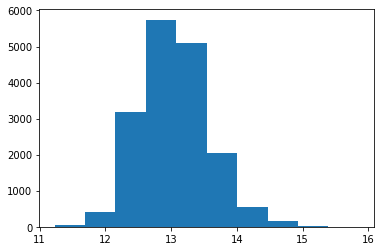

In [103]:
plt.hist(training_data['price_log'])

In [105]:
target = training_data['price_log']

LINEAR MODEL

In [96]:
model3 = ols(formula='price~sqft_living_log', data=training_data).fit()


In [97]:
model2 = ols(formula='price~sqft_living', data=training_data).fit()


In [98]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.694e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        13:25:08   Log-Likelihood:            -2.4046e+05
No. Observations:               17290   AIC:                         4.809e+05
Df Residuals:                   17288   BIC:                         4.809e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.347e+04   4991.006    -10.714      0.000   -6.33e+04   -4.37e+04
sqft_living   285.4779      2.193    130.167      0.000     281.179     289.777
==============================================================================
Omnibus:                    12367.474   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           507839.480
Skew:                           2.968   Prob(JB):                         0.00
Kurtosis:                      28.878   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
model = ols(formula='price~sqft_living+zip_98102+zip_98022+zip_98004+zip_98039+waterfront+bathrooms_binary+bedrooms+grade_cat_10+grade_cat_11+grade_cat_12+grade_cat_13', data=training_data).fit()

In [115]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     2831.
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        13:46:03   Log-Likelihood:            -2.3697e+05
No. Observations:               17290   AIC:                         4.740e+05
Df Residuals:                   17277   BIC:                         4.741e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.346e+05   6332.943     21.259      0.000    1.22e+05    1.47e+05
sqft_living        216.7512      3.020     71.769      0.000     210.831     222.671
zip_98102         3.186e+05   2.44e+04     13.079      0.000    2.71e+05    3.66e+05
zip_98022        -1.413e+05   1.59e+04     -8.906      0.000   -1.72e+05    -1.1e+05
zip_98004         5.973e+05   1.43e+04     41.720      0.000    5.69e+05    6.25e+05
zip_98039         1.019e+06   3.39e+04     30.088      0.000    9.53e+05    1.09e+06
waterfront        7.771e+05   1.88e+04     41.351      0.000     7.4e+05    8.14e+05
bathrooms_binary -1.553e+04   4097.743     -3.791      0.000   -2.36e+04   -7502.876
bedrooms         -2.264e+04   2203.952    -10.272      0.000    -2.7e+04   -1.83e+04
grade_cat_10      2.256e+05   8341.912     27.041      0.000    2.09e+05    2.42e+05
grade_cat_11       4.09e+05   1.37e+04     29.806      0.000    3.82e+05    4.36e+05
grade_cat_12      8.317e+05   2.75e+04     30.282      0.000    7.78e+05    8.86e+05
grade_cat_13      2.032e+06   6.75e+04     30.103      0.000     1.9e+06    2.16e+06
==============================================================================
Omnibus:                     7745.446   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           130616.120
Skew:                           1.723   Prob(JB):                         0.00
Kurtosis:                      16.017   Cond. No.                     9.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
X = training_data[['sqft_living', 'zip_98102', 'zip_98022', 'zip_98004', 'zip_98039', 'waterfront', 'bathrooms_binary', 'bedrooms', 'grade_cat_10', 'grade_cat_11', 'grade_cat_12', 'grade_cat_13']]
y = pd.DataFrame(training_data['price'], columns = ['price'])

In [149]:
for var in X:
    training_data[var] = scaler.fit_transform(training_data[[var]])

In [124]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [126]:
# Importing and initialize the linear regression model class
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [151]:
# Fit the model to train data
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(subset)
y_hat_test = linreg.predict(X_test)

In [153]:
# Calculate residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

ValueError: Unable to coerce to DataFrame, shape must be (12967, 1): given (17290, 1)

In [135]:
train_residuals

,price
11191,-35039.562637
2197,788930.107595
6455,-129830.106267
16762,179126.864230
8463,-134856.723832
...,...
14510,60099.994750
2190,200240.284585
9913,71608.472046
14006,83385.945778


In [130]:
# Import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error

In [132]:
# Calculate training and test MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 47044167854.19956
Test Mean Squarred Error: 47054217089.25717


In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [143]:
subset = training_data[['sqft_living_scaled',
 'zip_98102_scaled',
 'zip_98022_scaled',
 'zip_98004_scaled',
 'zip_98039_scaled',
 'waterfront_scaled',
 'bathrooms_binary_scaled',
 'bedrooms_scaled',
 'grade_cat_10_scaled',
 'grade_cat_11_scaled',
 'grade_cat_12_scaled',
 'grade_cat_13_scaled']]

In [144]:
subset

,sqft_living_scaled,zip_98102_scaled,zip_98022_scaled,zip_98004_scaled,zip_98039_scaled,waterfront_scaled,bathrooms_binary_scaled,bedrooms_scaled,grade_cat_10_scaled,grade_cat_11_scaled,grade_cat_12_scaled,grade_cat_13_scaled
0,-0.012462,-0.06818,-0.105128,-0.117889,-0.049346,-0.089698,0.802012,0.668070,-0.233369,-0.137101,-0.064666,-0.025231
1,0.889720,-0.06818,-0.105128,-0.117889,-0.049346,-0.089698,0.802012,1.732672,-0.233369,-0.137101,-0.064666,-0.025231
2,1.835381,-0.06818,-0.105128,-0.117889,-0.049346,-0.089698,0.802012,0.668070,-0.233369,7.293876,-0.064666,-0.025231
3,2.694084,-0.06818,-0.105128,-0.117889,-0.049346,-0.089698,0.802012,-0.396532,-0.233369,-0.137101,15.464116,-0.025231
4,0.509282,-0.06818,-0.105128,-0.117889,-0.049346,-0.089698,0.802012,-0.396532,-0.233369,-0.137101,-0.064666,-0.025231
...,...,...,...,...,...,...,...,...,...,...,...,...
17285,1.259289,-0.06818,-0.105128,-0.117889,-0.049346,-0.089698,0.802012,1.732672,-0.233369,-0.137101,-0.064666,-0.025231
17286,-0.849425,-0.06818,-0.105128,-0.117889,-0.049346,-0.089698,-1.246864,-1.461134,-0.233369,-0.137101,-0.064666,-0.025231
17287,-1.121167,-0.06818,-0.105128,-0.117889,-0.049346,-0.089698,-1.246864,-0.396532,-0.233369,-0.137101,-0.064666,-0.025231
17288,-0.197246,-0.06818,-0.105128,-0.117889,-0.049346,-0.089698,-1.246864,-0.396532,-0.233369,-0.137101,-0.064666,-0.025231


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(training_data[[var]])

In [139]:
subset_scaled = []
for var in X_train:
    new_col = var +"_scaled"
    training_data[new_col] = scaler.fit_transform(training_data[[var]])
    subset_scaled.append(new_col)

In [140]:
subset_scaled

['sqft_living_scaled',
 'zip_98102_scaled',
 'zip_98022_scaled',
 'zip_98004_scaled',
 'zip_98039_scaled',
 'waterfront_scaled',
 'bathrooms_binary_scaled',
 'bedrooms_scaled',
 'grade_cat_10_scaled',
 'grade_cat_11_scaled',
 'grade_cat_12_scaled',
 'grade_cat_13_scaled']

In [ ]:
y_train